# E-Commerce Customer Spending Prediction

#### Objective

This project aims to predict yearly customer spending using variables such as time spent on the app, website, average session length, and membership duration. This analysis helps the company decide whether to focus more on the mobile app or the website for increasing sales.

#### Dataset Description

| Feature              | Description                                                  |
| -------------------- | ------------------------------------------------------------ |
| Avg. Session Length  | Average duration (minutes) of in-store style advice sessions |
| Time on App          | Average time spent on the mobile app (minutes)               |
| Time on Website      | Average time spent on the website (minutes)                  |
| Length of Membership | Number of years the customer has been a member               |
| Yearly Amount Spent  | Target variable: Amount spent in dollars per year            |


## 1. Imports and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customers = pd.read_csv("Ecommerce Customers")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## 2. Understanding Data

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## 3. Data Cleaning

####  3.1 Check for missing values

In [6]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

#### 3.2 Check for duplicates

In [7]:
customers.duplicated().sum()

np.int64(0)

In [8]:
customers.shape

(500, 8)

## 4. Exploratory Data Analysis

In [9]:
sns.set_style('darkgrid')
sns.set_palette("colorblind")

#### 4.1 Relationship: Time on Website vs Yearly Spending

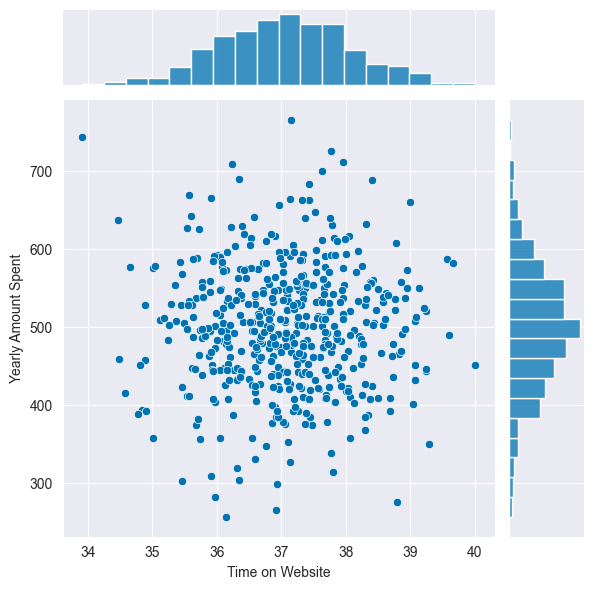

In [12]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)


#### 4.2 Relationship: Time on App vs Yearly Spending

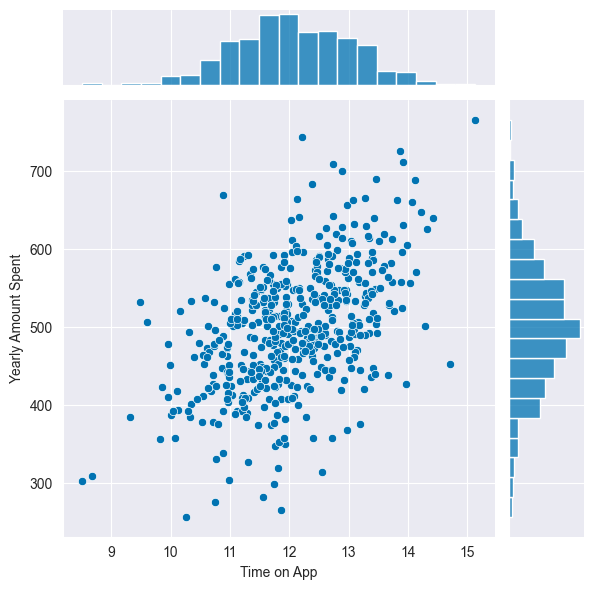

In [13]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

#### 4.3 Relationship: Time on App vs Length of Membership

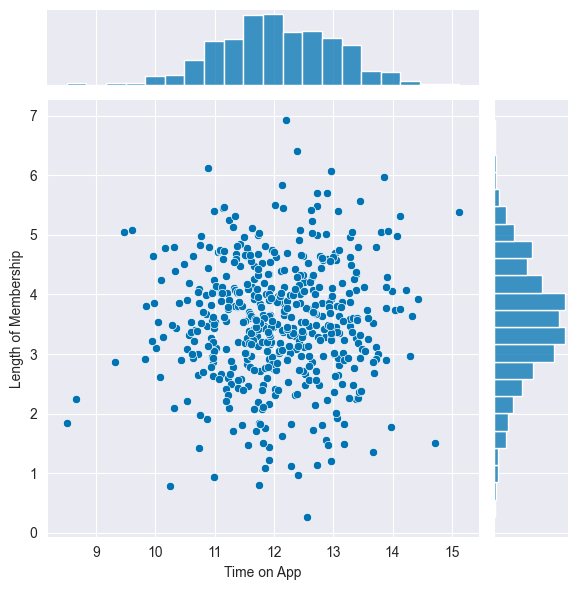

In [14]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers)

##### 4.4 Pairplot (All Features)

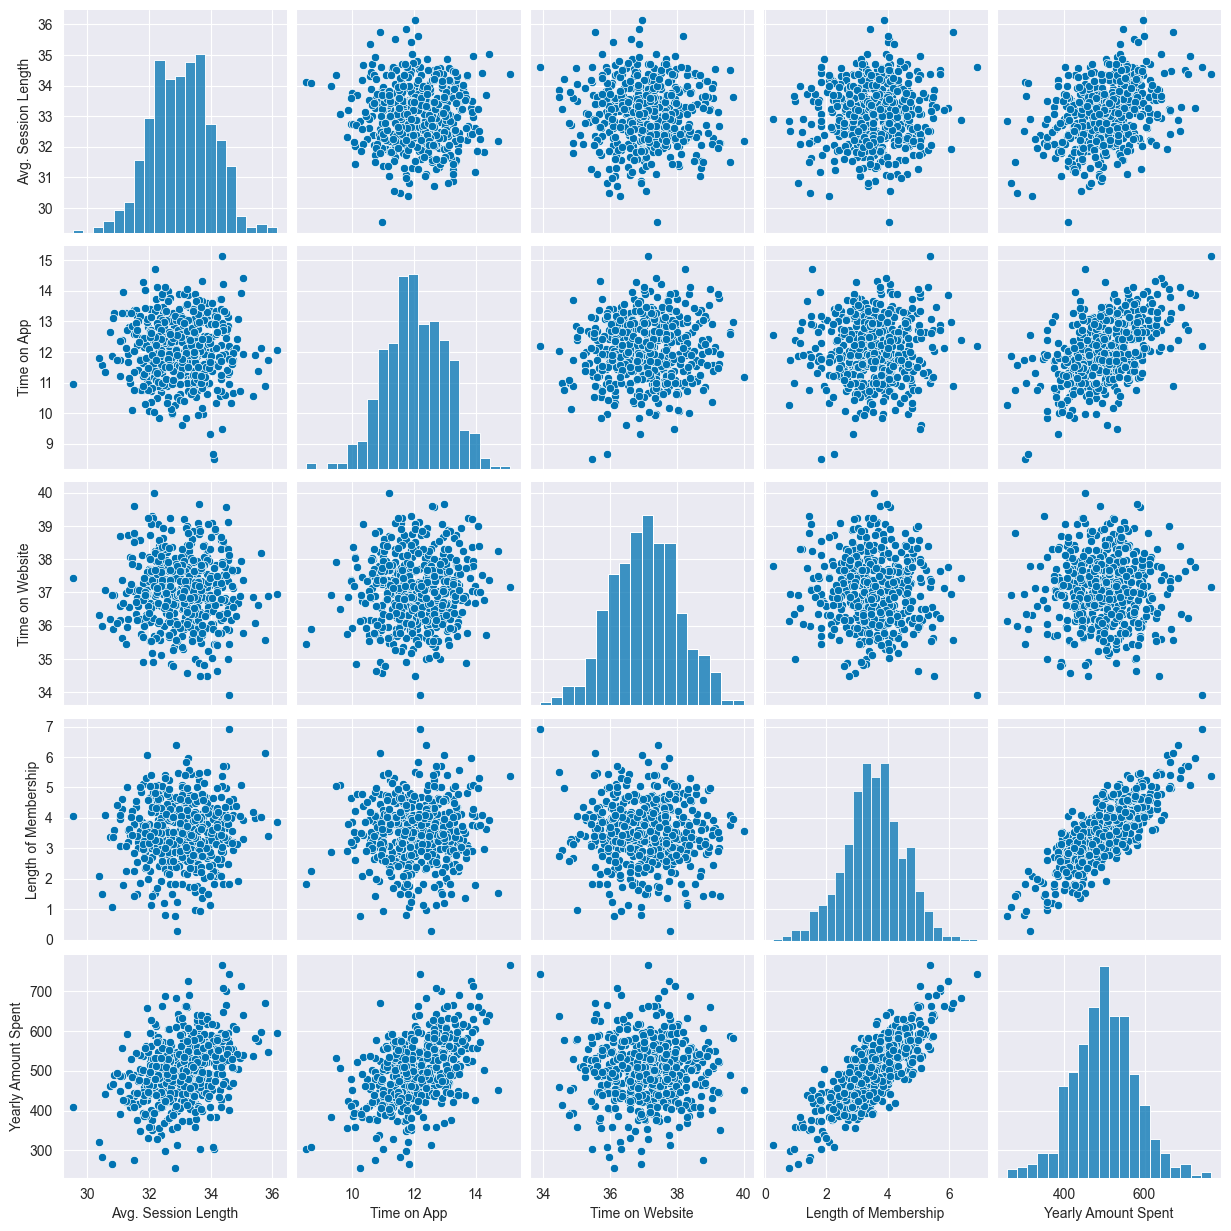

In [15]:
sns.pairplot(customers)

##### 4.5 Regression Plot: Membership Length vs Spending

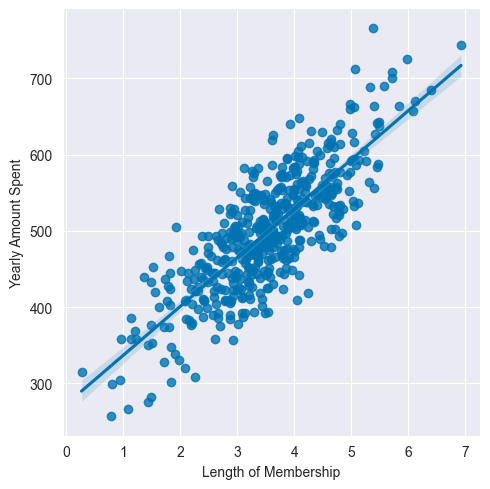

In [16]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## 5. Machine Learning Model: Linear Regression

#### 5.1 Define Features & Target

In [17]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

#### 5.2 Split Train & Test Data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### 5.3 Train the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

#### 5.4 View Coefficients

In [23]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## 6. Prediction & Evaluation

#### 5.1 Predict on Test Data

In [24]:
predictions = lm.predict( X_test)

##### 6.2 Actual vs Predicted


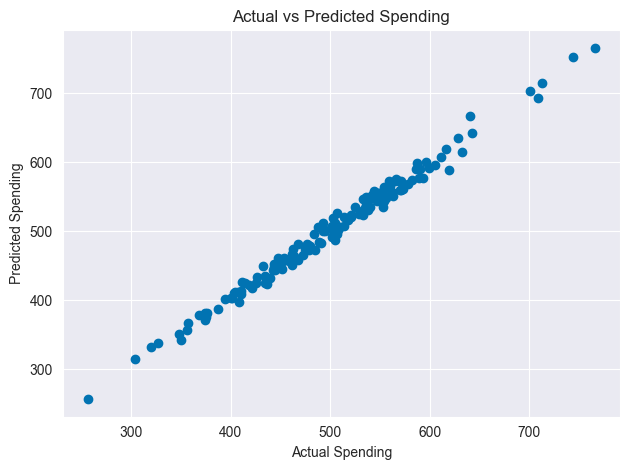

In [27]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Spending')
plt.ylabel('Predicted Spending')
plt.title('Actual vs Predicted Spending')
plt.tight_layout()
plt.show()

#### 6.3 Evaluating the Model

##### 6.3.1 (R-Square)

In [31]:
print(f"r.score for test: {lm.score(X_test,y_test)}")
print(f"r.score for train: {lm.score(X_train,y_train)}")

r.score for test: 0.9890046246741234
r.score for train: 0.9817562058732432


##### 6.3.2 Evaluation Metrics

In [28]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


### 6.4 Residuals Distribution

Text(0.5, 1.0, 'Residuals Distribution')

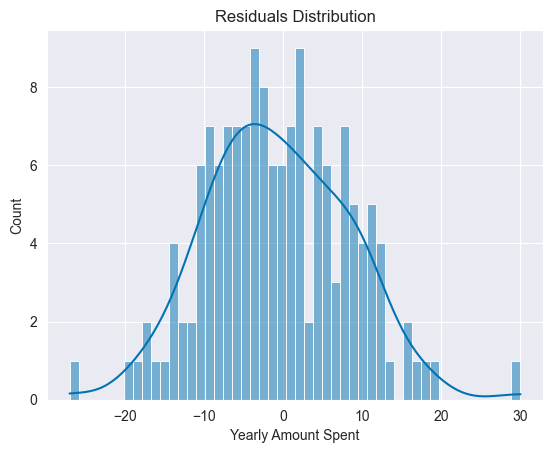

In [29]:
sns.histplot((y_test - predictions), bins=50, kde=True)
plt.title('Residuals Distribution')

## Key Insight

| Feature                | Coefficient | Insight                                   |
| ---------------------- | ----------- | ----------------------------------------- |
| `Avg. Session Length`  | \~25.98     | +\$25.98 per additional minute in session |
| `Time on App`          | \~38.59     | +\$38.59 per additional minute on the app |
| `Time on Website`      | \~0.19      | Little to no effect on spending           |
| `Length of Membership` | \~61.27     | Most significant predictor of spending    |

* Time on App significantly influences customer spending.

* Time on Website shows very little impact.

*  Length of Membership is the strongest predictor of high spending.

* Residuals are normally distributed → Model fits data wel

##  Conclusion & Recommendation

Based on this analysis:

* The company should invest more in enhancing the mobile app experience.

* Website improvements may not increase revenue significantly.

* Focusing on customer loyalty programs (to increase membership length) will yield the highest ROI in the long term.